# 0. Created by 6610402230 ศิริสุข ทานธรรม

# 1. Preprocessing

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import random

seed = 1
random.seed(seed)
np.random.seed(seed)  

## 1.1 Import Dataset

In [61]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /Users/sirisuk/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1


In [62]:
!ls {path}

taxi_trip_pricing.csv


In [63]:
path = Path(path)
df = pd.read_csv(path / 'taxi_trip_pricing.csv' )
print(df.info(),df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None (1000, 11)


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [64]:
df.dropna(inplace=True)
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


(None, (562, 11))

## 1.2 Categorical Normalization

In [65]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,1,0,3.56,0.80,0.32,53.82,36.2624
2,36.87,1,1,1.0,0,0,2.70,1.21,0.15,37.27,52.9032
5,8.64,0,1,2.0,2,0,2.55,1.71,0.48,89.33,60.2028
12,41.79,3,1,3.0,0,0,4.60,1.77,0.11,86.95,88.1328
14,9.91,1,0,2.0,0,0,2.32,1.26,0.34,41.72,28.9914


In [66]:
Y = df.Trip_Price
X = df.drop('Trip_Price',axis=1)
Y

0      36.2624
2      52.9032
5      60.2028
12     88.1328
14     28.9914
        ...   
990    56.6394
992    30.7837
994    51.8548
995    34.4049
998    61.2090
Name: Trip_Price, Length: 562, dtype: float64

In [67]:
X

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,2,0,3.0,1,0,3.56,0.80,0.32,53.82
2,36.87,1,1,1.0,0,0,2.70,1.21,0.15,37.27
5,8.64,0,1,2.0,2,0,2.55,1.71,0.48,89.33
12,41.79,3,1,3.0,0,0,4.60,1.77,0.11,86.95
14,9.91,1,0,2.0,0,0,2.32,1.26,0.34,41.72
...,...,...,...,...,...,...,...,...,...,...
990,40.17,1,0,3.0,1,0,3.81,0.66,0.42,62.66
992,14.34,0,0,1.0,2,0,3.23,1.01,0.29,45.07
994,18.69,1,0,3.0,2,0,4.90,1.79,0.17,79.41
995,5.49,0,1,4.0,2,0,2.39,0.62,0.49,58.39


## 1.3 Scale Feature

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape ,X_scaled

((562, 10),
 array([[-0.39854275,  0.85571818, -0.68925004, ..., -0.97648556,
          0.27698828, -0.24938097],
        [ 0.43043956, -0.10037251,  1.45085229, ..., -0.02292647,
         -1.20472843, -0.76495987],
        [-0.90530077, -1.05646321,  1.45085229, ...,  1.13995046,
          1.67154519,  0.8568551 ],
        ...,
        [-0.42977154, -0.10037251, -0.68925004, ...,  1.32601077,
         -1.03040882,  0.54781928],
        [-1.05434724, -1.05646321,  1.45085229, ..., -1.39512125,
          1.758705  , -0.10701265],
        [ 0.93625125,  0.85571818, -0.68925004, ..., -0.92997048,
         -1.03040882,  1.65467841]]))

## 1.4 Split dataset

In [69]:
from sklearn.model_selection import train_test_split

X_scaled = np.array(X_scaled)
Y = np.array(Y)

X_temp,X_test,Y_temp,Y_test = train_test_split(X_scaled,Y,test_size=0.3) 
X_train,X_valid,Y_train,Y_valid = train_test_split(X_temp,Y_temp,test_size=0.4)
print(X_train.shape,X_valid.shape,X_test.shape)

(235, 10) (158, 10) (169, 10)


# 2. Classical Linear Regression

## 2.1 Form Classical Linear Regression

In [70]:
class LinearRGS:
    def __init__(self):
        self.b = np.random.randn()
        self.W = None
        self.W_history = None
        self.b_history = None
        self.alpha = None
        self.loss = None
        self.X_valid = None
        self.Y_valid = None
        self.valid_loss = None 

    def MSE_loss(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,b=None): 
        if b is None:b=self.b
        
        Y_pred = np.dot(X,W) + b
        l = np.mean((Y_pred - Y)**2)
        return l
    
    def MAE_loss(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,b=None): 
        if b is None:b=self.b
        
        Y_pred = np.dot(X,W) + b
        l = np.mean(np.abs(Y_pred - Y))
        return l
     
    def Gradient_MSE(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray) -> np.ndarray:
        Y_pred = np.dot(X,W) + self.b
        error = Y_pred - Y
        G_w = (2/X.shape[0]) * np.dot(X.T,(Y_pred - Y))
        G_b = (2/X.shape[0]) * np.sum(error)
        return G_w,G_b

    def set_learning_rate(self,alpha):
        self.alpha = alpha
        
    def set_validation_set(self,X : np.ndarray,Y : np.ndarray):
        self.X_valid = X
        self.Y_valid = Y
        
    def test_score(self,X : np.ndarray,Y : np.ndarray,W=None):
        if W is None :W = self.W
        
        MSE_loss = self.MSE_loss(W,X,Y)
        MAE_loss = self.MAE_loss(W,X,Y)
        return MSE_loss,MAE_loss
        
    def fit(self,X : np.ndarray,Y : np.ndarray,iterate=10):
        if (X.shape[0] != Y.shape[0]):return -1
        if(self.alpha == None):return -2

        n = X.shape[0]
        n_features = X.shape[1]
        self.W = np.zeros(n_features)
        self.W_history = np.empty((iterate,n_features))
        self.b_history = np.empty(iterate)
        self.loss = np.array([])
        
        self.loss = np.append(self.loss, self.MSE_loss(self.W, X, Y))
        if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
            self.valid_loss = np.array([])
            self.valid_loss = np.append(self.valid_loss, self.MSE_loss(self.W, self.X_valid, self.Y_valid))
        
        # print(type(self.X_valid),type(self.Y_valid),type(self.valid_loss))
            
        print(f"Round init : loss = {self.loss[-1]:.4f}, valid_loss = {f"{self.valid_loss[-1]:.4f}" if isinstance(self.valid_loss,np.ndarray) else 'NONE'}")
        for i in range(iterate):
            grad_W, grad_b = self.Gradient_MSE(self.W, X, Y)
            self.W -= self.alpha * grad_W
            self.b -= self.alpha * grad_b
            self.W_history[i] = self.W
            self.b_history[i] = self.b
            self.loss = np.append(self.loss, self.MSE_loss(self.W, X, Y))
            if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
                self.valid_loss = np.append(self.valid_loss, self.MSE_loss(self.W, self.X_valid, self.Y_valid))
                
            print(f"Round {i} : loss = {self.loss[-1]:.4f}, valid_loss = {f"{self.valid_loss[-1]:.4f}" if isinstance(self.valid_loss,np.ndarray) else 'NONE'} , Grad_W norm: {np.linalg.norm(grad_W):.4f}, Grad_b: {grad_b:.4f}")

## 2.2 Training

In [71]:
model = LinearRGS()
model.set_learning_rate(10e-2)
model.set_validation_set(X_valid,Y_valid)
model.fit(X_train,Y_train,30)

Round init : loss = 4232.9649, valid_loss = 6486.5694
Round 0 : loss = 2897.2816, valid_loss = 4742.0021 , Grad_W norm: 57.3852, Grad_b: -106.9929
Round 1 : loss = 2011.9623, valid_loss = 3530.9177 , Grad_W norm: 48.2562, Grad_b: -86.1422
Round 2 : loss = 1419.5825, valid_loss = 2682.1507 , Grad_W norm: 40.9309, Grad_b: -69.5306
Round 3 : loss = 1019.6573, valid_loss = 2081.6795 , Grad_W norm: 34.9452, Grad_b: -56.2598
Round 4 : loss = 747.3823, valid_loss = 1652.8613 , Grad_W norm: 29.9794, Grad_b: -45.6293
Round 5 : loss = 560.5446, valid_loss = 1343.7335 , Grad_W norm: 25.8099, Grad_b: -37.0913
Round 6 : loss = 431.3826, valid_loss = 1118.7732 , Grad_W norm: 22.2771, Grad_b: -30.2164
Round 7 : loss = 341.4707, valid_loss = 953.5011 , Grad_W norm: 19.2636, Grad_b: -24.6670
Round 8 : loss = 278.4733, valid_loss = 830.9162 , Grad_W norm: 16.6808, Grad_b: -20.1766
Round 9 : loss = 234.0638, valid_loss = 739.1200 , Grad_W norm: 14.4594, Grad_b: -16.5349
Round 10 : loss = 202.5781, valid_

## 2.3 Evaluation

In [72]:
iterate = model.W_history.shape[0]
print(iterate)

test_loss = np.array([])
for i in range(iterate):
    W = model.W_history[i]
    b = model.b_history[i]
    loss = model.MSE_loss(W,X_test,Y_test,b)
    test_loss = np.append(test_loss,loss)
    
test_loss

30


array([4087.36874297, 2966.01574784, 2188.14993926, 1643.70927642,
       1259.3570847 ,  985.75502185,  789.40755678,  647.37932148,
        543.83804276,  467.77011456,  411.45721482,  369.45169797,
        337.88190171,  313.97756821,  295.74331461,  281.73243873,
        270.88920936,  262.43821667,  255.80626785,  250.56692843,
        246.40091396,  243.0676397 ,  240.38466895,  238.21278365,
        236.4450785 ,  234.99895001,  233.81017934,  232.82853758,
        232.0145039 ,  231.33680113])

## 2.4 Loss Visualization

MSE Loss is 231.3368011343591
MAE Loss is 9.082863156608363


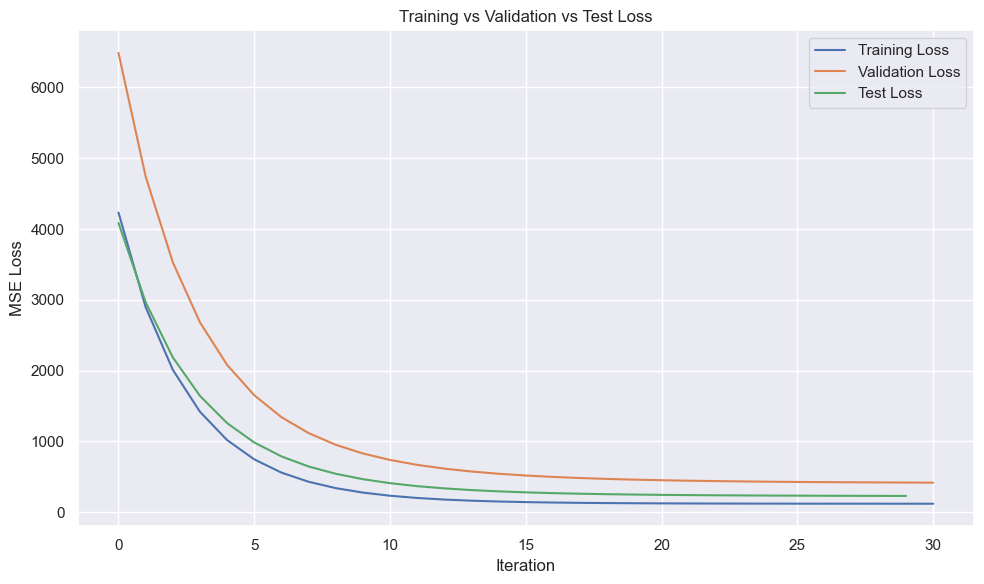

In [73]:
MSE,MAE = model.test_score(X_test,Y_test) 
print(f"MSE Loss is {MSE}")
print(f"MAE Loss is {MAE}")

plt.figure(figsize=(10, 6))  

sns.lineplot(x=np.arange(model.loss.shape[0]), y=model.loss, label='Training Loss')
sns.lineplot(x=np.arange(model.valid_loss.shape[0]), y=model.valid_loss, label='Validation Loss')
sns.lineplot(x=np.arange(test_loss.shape[0]), y=test_loss, label='Test Loss') 

plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation vs Test Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()  #reduce padding
plt.show()

## 2.5 Visualize Dataset

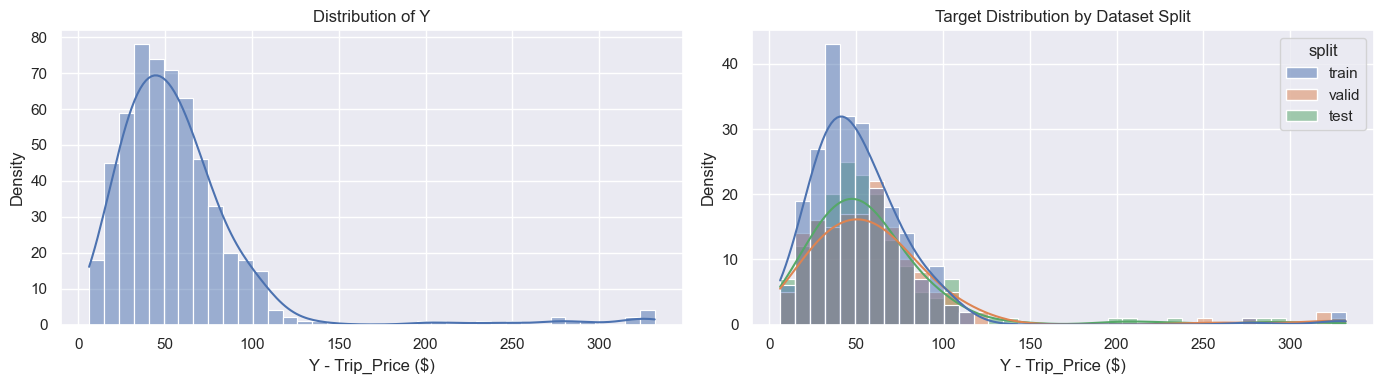

In [74]:
df_dist = pd.DataFrame({
    'value': np.concatenate([Y_train, Y_valid, Y_test]),
    'split': ['train'] * len(Y_train) + ['valid'] * len(Y_valid) + ['test'] * len(Y_test)
})

# --- Create subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # 1 row, 2 columns

# Left plot: full Y
sns.histplot(Y, kde=True,ax=axes[0], fill=True)
axes[0].set_title("Distribution of Y")
axes[0].set_xlabel("Y - Trip_Price ($)")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Right plot: comparison of Y_train, Y_valid, Y_test
sns.histplot(data=df_dist,kde=True, x='value', hue='split', fill=True, ax=axes[1])
axes[1].set_title("Target Distribution by Dataset Split")
axes[1].set_xlabel("Y - Trip_Price ($)")
axes[1].set_ylabel("Density")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 3. Regularization

## 3.1 Form Linear Regression with L1 Regularization 

In [75]:
class LinearRGS:
    def __init__(self):
        self.b = np.random.randn()
        self.W = None
        self.W_history = None
        self.b_history = None
        self.alpha = None
        self._lambda = None
        self.loss = None
        self.X_valid = None
        self.Y_valid = None
        self.valid_loss = None 

    def MSE_loss(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,_lambda=0.0,b=None): 
        if b is None:b=self.b
        
        Y_pred = np.dot(X,W) + b
        l = np.mean((Y_pred - Y)**2)
        # penalty = _lambda * np.sum(W ** 2) #l2
        penalty = _lambda * np.sum(np.abs(W)) #l1
        return l + penalty
    
    def MAE_loss(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,_lambda=0.0,b=None): 
        if b is None:b=self.b
        
        Y_pred = np.dot(X,W) + b
        l = np.mean(np.abs(Y_pred - Y))
        # penalty = _lambda * np.sum(W ** 2) #l2
        penalty = _lambda * np.sum(np.abs(W)) #l1
        return l + penalty
     
    def Gradient_MSE(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,_lambda=0.0) -> np.ndarray:
        Y_pred = np.dot(X,W) + self.b
        error = Y_pred - Y
        # G_w = (2/X.shape[0]) * np.dot(X.T,(Y_pred - Y)) + (_lambda * 2 * W) #l2
        G_w = (2/X.shape[0]) * np.dot(X.T,(Y_pred - Y)) + (_lambda * np.sign(W)) #l1
        G_b = (2/X.shape[0]) * np.sum(error)
        return G_w,G_b

    def set_learning_rate(self,alpha):
        self.alpha = alpha
        
    def set_regularize_lambda(self,_lambda):
        self._lambda = _lambda
        
    def set_validation_set(self,X : np.ndarray,Y : np.ndarray):
        self.X_valid = X
        self.Y_valid = Y
        
    def test_score(self,X : np.ndarray,Y : np.ndarray,W=None):
        if W is None :W = self.W
        
        MSE_loss = self.MSE_loss(W,X,Y,self._lambda)
        MAE_loss = self.MAE_loss(W,X,Y,self._lambda)
        return MSE_loss,MAE_loss
        
    def fit(self,X : np.ndarray,Y : np.ndarray,iterate=10):
        if (X.shape[0] != Y.shape[0]):return -1
        if(self.alpha == None):return -2
        if(self._lambda == None):return -3

        n = X.shape[0]
        n_features = X.shape[1]
        self.W = np.zeros(n_features)
        self.W_history = np.empty((iterate,n_features))
        self.b_history = np.empty(iterate)
        self.loss = np.array([])
        
        self.loss = np.append(self.loss, self.MSE_loss(self.W, X, Y,self._lambda))
        if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
            self.valid_loss = np.array([])
            self.valid_loss = np.append(self.valid_loss, self.MSE_loss(self.W, self.X_valid, self.Y_valid,self._lambda))
        
        # print(type(self.X_valid),type(self.Y_valid),type(self.valid_loss))
            
        print(f"Round init : loss = {self.loss[-1]:.4f}, valid_loss = {f"{self.valid_loss[-1]:.4f}" if isinstance(self.valid_loss,np.ndarray) else 'NONE'}")
        for i in range(iterate):
            grad_W, grad_b = self.Gradient_MSE(self.W, X, Y)
            self.W -= self.alpha * grad_W
            self.b -= self.alpha * grad_b
            self.W_history[i] = self.W
            self.b_history[i] = self.b
            self.loss = np.append(self.loss, self.MSE_loss(self.W, X, Y,self._lambda))
            if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
                self.valid_loss = np.append(self.valid_loss, self.MSE_loss(self.W, self.X_valid, self.Y_valid,self._lambda))
                
            print(f"Round {i} : loss = {self.loss[-1]:.4f}, valid_loss = {f"{self.valid_loss[-1]:.4f}" if isinstance(self.valid_loss,np.ndarray) else 'NONE'} , Grad_W norm: {np.linalg.norm(grad_W):.4f}, Grad_b: {grad_b:.4f}")

## 3.1 Training

In [76]:
model = LinearRGS()
model.set_learning_rate(10e-2)
model.set_regularize_lambda(10e-1)
model.set_validation_set(X_valid,Y_valid)
model.fit(X_train,Y_train,100)

Round init : loss = 4175.2296, valid_loss = 6418.4173
Round 0 : loss = 2873.5227, valid_loss = 4709.2479 , Grad_W norm: 57.4374, Grad_b: -105.9082
Round 1 : loss = 2012.0384, valid_loss = 3523.5937 , Grad_W norm: 48.2970, Grad_b: -85.2838
Round 2 : loss = 1436.6663, valid_loss = 2693.3112 , Grad_W norm: 40.9566, Grad_b: -68.8494
Round 3 : loss = 1049.0622, valid_loss = 2106.4168 , Grad_W norm: 34.9567, Grad_b: -55.7177
Round 4 : loss = 785.8324, valid_loss = 1687.6639 , Grad_W norm: 29.9791, Grad_b: -45.1966
Round 5 : loss = 605.7114, valid_loss = 1386.0598 , Grad_W norm: 25.8009, Grad_b: -36.7451
Round 6 : loss = 481.5861, valid_loss = 1166.7649 , Grad_W norm: 22.2622, Grad_b: -29.9386
Round 7 : loss = 395.4828, valid_loss = 1005.7870 , Grad_W norm: 19.2453, Grad_b: -24.4434
Round 8 : loss = 335.3857, valid_loss = 886.4759 , Grad_W norm: 16.6608, Grad_b: -19.9963
Round 9 : loss = 293.1982, valid_loss = 797.1891 , Grad_W norm: 14.4391, Grad_b: -16.3891
Round 10 : loss = 263.4235, valid

## 3.2 Evaluation

In [77]:
iterate = model.W_history.shape[0]
print(iterate)

test_loss = np.array([])
for i in range(iterate):
    W = model.W_history[i]
    b = model.b_history[i]
    loss = model.MSE_loss(W,X_test,Y_test,model._lambda,b)
    test_loss = np.append(test_loss,loss)
    

100


## 3.3 Loss Visualization

MSE Loss is 294.9806380302148
MAE Loss is 76.54901211532696


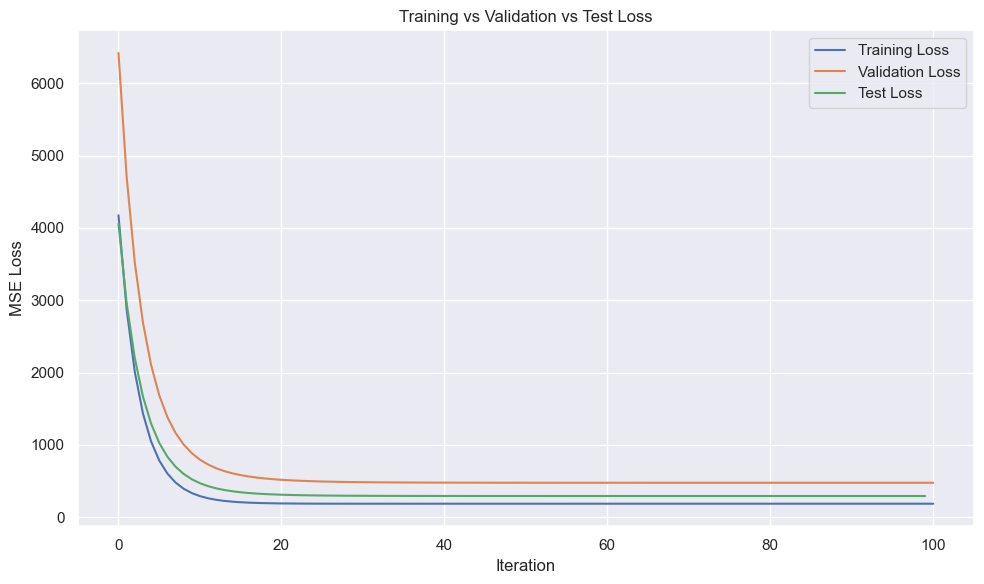

In [78]:
MSE,MAE = model.test_score(X_test,Y_test) 
print(f"MSE Loss is {MSE}")
print(f"MAE Loss is {MAE}")

plt.figure(figsize=(10, 6))  

sns.lineplot(x=np.arange(model.loss.shape[0]), y=model.loss, label='Training Loss')
sns.lineplot(x=np.arange(model.valid_loss.shape[0]), y=model.valid_loss, label='Validation Loss')
sns.lineplot(x=np.arange(test_loss.shape[0]), y=test_loss, label='Test Loss') 

plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation vs Test Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()  #reduce padding
plt.show()

# 4. Ensemble - Gradient Boosting

## 4.1 Form Linear Regression with L1 Regularization

In [79]:

class LinearRGS:
    def __init__(self):
        self.b = np.random.randn()
        self.W = None
        self.W_history = None
        self.b_history = None
        self.alpha = None
        self._lambda = None
        self.loss = None
        self.X_valid = None
        self.Y_valid = None
        self.valid_loss = None 

    def MSE_loss(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,_lambda=0.0,b=None): 
        if b is None:b=self.b
        
        Y_pred = np.dot(X,W) + b
        l = np.mean((Y_pred - Y)**2)
        # penalty = _lambda * np.sum(W ** 2) #l2
        penalty = _lambda * np.sum(np.abs(W)) #l1
        return l + penalty
    
    def MAE_loss(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,_lambda=0.0,b=None): 
        if b is None:b=self.b
        
        Y_pred = np.dot(X,W) + b
        l = np.mean(np.abs(Y_pred - Y))
        # penalty = _lambda * np.sum(W ** 2) #l2
        penalty = _lambda * np.sum(np.abs(W)) #l1
        return l + penalty
     
    def Gradient_MSE(self,W : np.ndarray,X : np.ndarray,Y : np.ndarray,_lambda=0.0) -> np.ndarray:
        Y_pred = np.dot(X,W) + self.b
        error = Y_pred - Y
        # G_w = (2/X.shape[0]) * np.dot(X.T,(Y_pred - Y)) + (_lambda * 2 * W) #l2
        G_w = (2/X.shape[0]) * np.dot(X.T,(Y_pred - Y)) + (_lambda * np.sign(W)) #l1
        G_b = (2/X.shape[0]) * np.sum(error)
        return G_w,G_b

    def set_learning_rate(self,alpha):
        self.alpha = alpha
        
    def set_regularize_lambda(self,_lambda):
        self._lambda = _lambda
        
    def set_validation_set(self,X : np.ndarray,Y : np.ndarray):
        self.X_valid = X
        self.Y_valid = Y
        
    def test_score(self,X : np.ndarray,Y : np.ndarray,W=None):
        if W is None :W = self.W
        
        MSE_loss = self.MSE_loss(W,X,Y,self._lambda)
        MAE_loss = self.MAE_loss(W,X,Y,self._lambda)
        return MSE_loss,MAE_loss
        
    def fit(self,X : np.ndarray,Y : np.ndarray,iterate=10):
        if (X.shape[0] != Y.shape[0]):return -1
        if(self.alpha == None):return -2
        if(self._lambda == None):return -3

        n = X.shape[0]
        n_features = X.shape[1]
        self.W = np.zeros(n_features)
        self.W_history = np.empty((iterate,n_features))
        self.b_history = np.empty(iterate)
        self.loss = np.array([])
        
        self.loss = np.append(self.loss, self.MSE_loss(self.W, X, Y,self._lambda))
        if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
            self.valid_loss = np.array([])
            self.valid_loss = np.append(self.valid_loss, self.MSE_loss(self.W, self.X_valid, self.Y_valid,self._lambda))
            
        for i in range(iterate):
            grad_W, grad_b = self.Gradient_MSE(self.W, X, Y)
            self.W -= self.alpha * grad_W
            self.b -= self.alpha * grad_b
            self.W_history[i] = self.W
            self.b_history[i] = self.b
            self.loss = np.append(self.loss, self.MSE_loss(self.W, X, Y,self._lambda))
            if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
                self.valid_loss = np.append(self.valid_loss, self.MSE_loss(self.W, self.X_valid, self.Y_valid,self._lambda))



## 4.2 Form Gradient Boosting

In [80]:

class GradientBoosted:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.alpha = None
        self.weak_alpha = None
        self._lambda = None
        self.models = None
        self.X_valid = None
        self.Y_valid = None
        self.loss = None
        self.valid_loss = None
        
    def set_validation_set(self,X : np.ndarray,Y : np.ndarray):
        self.X_valid = X
        self.Y_valid = Y 
        
    def set_learning_rate(self,alpha,weak_alpha):
        self.alpha = alpha
        self.weak_alpha = weak_alpha
        
    def set_regularize_lambda(self,_lambda):
        self._lambda = _lambda
    
    def MSE_loss(self,H : np.ndarray,Y: np.ndarray):
        return np.mean((H - Y) ** 2)

    def MAE_loss(self,H : np.ndarray,Y: np.ndarray):
        return np.mean(np.abs(H - Y))
        
        
    def fit(self, X: np.ndarray, Y: np.ndarray, iterate=10):
        if (X.shape[0] != Y.shape[0]):return -1
        if(self.alpha == None or self.weak_alpha == None):return -2
        if(self._lambda == None):return -3
        
        n = X.shape[0]
        self.models = np.array([])
        self.loss = np.array([])
        self.valid_loss = np.array([])
        
        H = np.zeros(n)
        H_valid = None
        
        self.loss = np.append(self.loss,self.MSE_loss(H,Y))
        
        if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
            H_valid = np.zeros(self.X_valid.shape[0])
            self.valid_loss = np.append(self.valid_loss,self.MSE_loss(H_valid,self.Y_valid))
        
        print(f"Round init : loss = {self.loss[-1]:.4f}, valid_loss = {f"{self.valid_loss[-1]:.4f}" if isinstance(self.valid_loss,np.ndarray) else 'NONE'}")
        for i in range(self.n_estimators):
            neg_grad = Y - H
            # Train weak learner to approximate negative gradient
            weak_learner = LinearRGS()
            weak_learner.set_learning_rate(self.weak_alpha) 
            weak_learner.set_regularize_lambda(self._lambda)
            
            if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
                neg_grad_valid = self.Y_valid - H_valid
                weak_learner.set_validation_set(self.X_valid,neg_grad_valid)
                
            weak_learner.fit(X, neg_grad, iterate)
            self.models = np.append(self.models,weak_learner)
            
            H += self.alpha * (np.dot(X, weak_learner.W) + weak_learner.b)
            
            self.loss = np.append(self.loss,self.MSE_loss(H,Y))
            if isinstance(self.X_valid, np.ndarray) and isinstance(self.Y_valid, np.ndarray):
                H_valid += self.alpha * (np.dot(self.X_valid, weak_learner.W) + weak_learner.b)
                self.valid_loss = np.append(self.valid_loss,self.MSE_loss(H_valid,self.Y_valid))
            
            print(f"Round {i} : loss = {self.loss[-1]:.4f}, valid_loss = {f"{self.valid_loss[-1]:.4f}" if isinstance(self.valid_loss,np.ndarray) else 'NONE'}")
                
    
    def predict(self, X : np.ndarray) -> np.ndarray:
        y_pred = np.zeros(X.shape[0])
        for model in self.models:
            y_pred += self.alpha * (np.dot(X, model.W) + model.b)
            
        return y_pred
    
    def test_score(self, X: np.ndarray, y: np.ndarray):
        y_pred = self.predict(X)
        return self.MSE_loss(y_pred,y),self.MAE_loss(y_pred,y)

## 4.3 Training

In [81]:

model = GradientBoosted(n_estimators=100)
model.set_learning_rate(alpha=10e-2,weak_alpha=10e-2)
model.set_regularize_lambda(10e-1)
model.set_validation_set(X_valid, Y_valid)
model.fit(X_train, Y_train, iterate=10)

Round init : loss = 4178.3476, valid_loss = 6422.1006
Round 0 : loss = 3520.6145, valid_loss = 5524.3968
Round 1 : loss = 2967.9492, valid_loss = 4762.4293
Round 2 : loss = 2506.4684, valid_loss = 4119.5348
Round 3 : loss = 2121.5242, valid_loss = 3577.3925
Round 4 : loss = 1799.6877, valid_loss = 3118.8742
Round 5 : loss = 1528.2651, valid_loss = 2727.3664
Round 6 : loss = 1301.3150, valid_loss = 2395.7642
Round 7 : loss = 1111.4895, valid_loss = 2114.6061
Round 8 : loss = 951.3712, valid_loss = 1873.9824
Round 9 : loss = 818.4497, valid_loss = 1671.1695
Round 10 : loss = 706.9972, valid_loss = 1498.3514
Round 11 : loss = 613.0455, valid_loss = 1350.1609
Round 12 : loss = 533.9712, valid_loss = 1223.1557
Round 13 : loss = 468.0333, valid_loss = 1115.1878
Round 14 : loss = 412.7777, valid_loss = 1022.8533
Round 15 : loss = 366.3960, valid_loss = 943.6646
Round 16 : loss = 327.3904, valid_loss = 875.5404
Round 17 : loss = 294.6154, valid_loss = 816.9047
Round 18 : loss = 266.9016, valid

## 4.4 Evaluation

In [82]:
iterate = model.models.shape[0]
print(iterate)

test_loss = np.array([])

for i in range(iterate):
    y_pred = np.zeros(X_test.shape[0]) 
    for m in model.models[:i+1]:
       y_pred += model.alpha * (np.dot(X_test, m.W) + m.b) 
    test_loss = np.append(test_loss,model.MSE_loss(y_pred,Y_test))
    
# test_loss

100


## 4.5 Loss Visualization

MSE Loss is 227.90401469706424
MAE Loss is 9.15228656141571


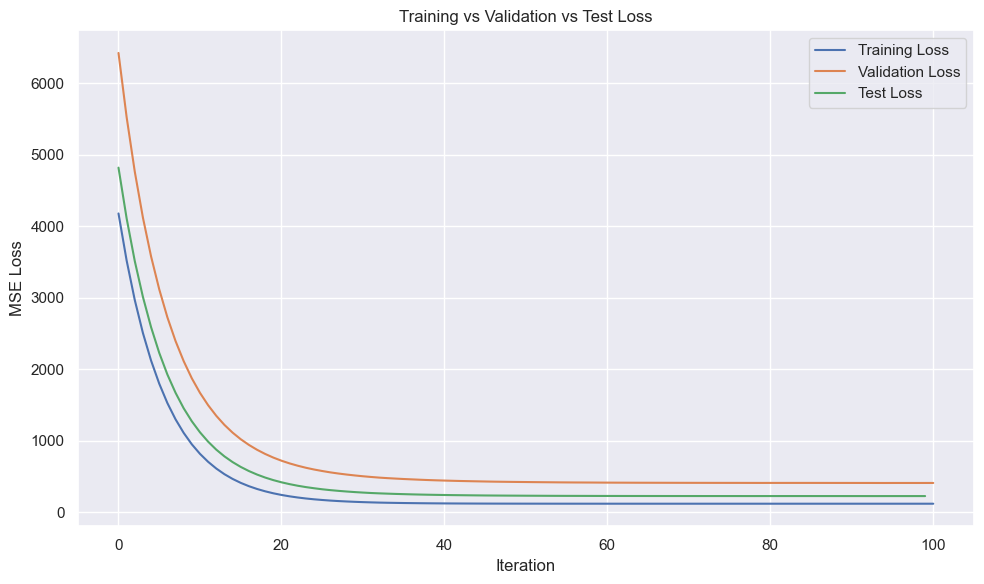

In [83]:
MSE,MAE = model.test_score(X_test,Y_test) 
print(f"MSE Loss is {MSE}")
print(f"MAE Loss is {MAE}")
plt.figure(figsize=(10, 6))  

sns.lineplot(x=np.arange(model.loss.shape[0]), y=model.loss, label='Training Loss')
sns.lineplot(x=np.arange(model.valid_loss.shape[0]), y=model.valid_loss, label='Validation Loss')
sns.lineplot(x=np.arange(test_loss.shape[0]), y=test_loss, label='Test Loss') 

plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation vs Test Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()  #reduce padding
plt.show()

# 5. Parameter Search And Analyst

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import pandas as pd

def parameter_grid_search(X_train, Y_train, X_valid, Y_valid, X_test, Y_test):
    # Define parameter grid
    n_estimators_list = [50, 100, 150]
    alpha_list = [0.001, 0.01, 0.1]
    weak_alpha_list = [0.001, 0.01, 0.1]
    lambda_list = [0.01, 0.1, 1.0]
    
    # Create all combinations of parameters
    param_grid = list(product(n_estimators_list, alpha_list, weak_alpha_list, lambda_list))
    

    results = []
    
    # Iterate through parameter combinations
    for i, (n_estimators, alpha, weak_alpha, lambda_val) in enumerate(param_grid):
        print(f"Training model {i+1}/{len(param_grid)}: n_estimators={n_estimators}, alpha={alpha}, weak_alpha={weak_alpha}, lambda={lambda_val}")
        
        # Initialize and train model
        model = GradientBoosted(n_estimators=n_estimators)
        model.set_learning_rate(alpha=alpha, weak_alpha=weak_alpha)
        model.set_regularize_lambda(lambda_val)
        model.set_validation_set(X_valid, Y_valid)
        model.fit(X_train, Y_train, iterate=10)
        
        # Get test metrics
        mse, mae = model.test_score(X_test, Y_test)
        
        # Store results
        results.append({
            'n_estimators': n_estimators,
            'alpha': alpha,
            'weak_alpha': weak_alpha,
            'lambda': lambda_val,
            'train_loss': model.loss[-1],
            'valid_loss': model.valid_loss[-1],
            'test_mse': mse,
            'test_mae': mae,
            'model': model
        })
    
    return pd.DataFrame(results)

def plot_learning_curves(models_df):
    # Find best model based on validation loss
    best_model_idx = models_df['valid_loss'].idxmin()
    best_model = models_df.loc[best_model_idx, 'model']
    best_params = models_df.loc[best_model_idx, ['n_estimators', 'alpha', 'weak_alpha', 'lambda']]
    
    print("Best parameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    
    # Calculate test loss for each iteration
    iterate = best_model.models.shape[0]
    test_loss = np.array([])
    for i in range(iterate):
        y_pred = np.zeros(X_test.shape[0]) 
        for m in best_model.models[:i+1]:
           y_pred += best_model.alpha * (np.dot(X_test, m.W) + m.b) 
        test_loss = np.append(test_loss, best_model.MSE_loss(y_pred, Y_test))
    
    # Plot learning curves
    plt.figure(figsize=(12, 8))
    sns.lineplot(x=np.arange(best_model.loss.shape[0]), y=best_model.loss, label='Training Loss')
    sns.lineplot(x=np.arange(best_model.valid_loss.shape[0]), y=best_model.valid_loss, label='Validation Loss')
    sns.lineplot(x=np.arange(test_loss.shape[0]), y=test_loss, label='Test Loss')
    plt.xlabel("Iteration")
    plt.ylabel("MSE Loss")
    plt.title(f"Learning Curves for Best Model\n(n_estimators={best_params['n_estimators']}, alpha={best_params['alpha']}, weak_alpha={best_params['weak_alpha']}, lambda={best_params['lambda']})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return best_model

def plot_parameter_impact(models_df):
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot impact of n_estimators
    sns.boxplot(x='n_estimators', y='valid_loss', data=models_df, ax=axes[0, 0])
    axes[0, 0].set_title('Impact of n_estimators on Validation Loss')
    axes[0, 0].set_ylabel('Validation Loss')
    
    # Plot impact of alpha
    sns.boxplot(x='alpha', y='valid_loss', data=models_df, ax=axes[0, 1])
    axes[0, 1].set_title('Impact of alpha on Validation Loss')
    axes[0, 1].set_ylabel('Validation Loss')
    
    # Plot impact of weak_alpha
    sns.boxplot(x='weak_alpha', y='valid_loss', data=models_df, ax=axes[1, 0])
    axes[1, 0].set_title('Impact of weak_alpha on Validation Loss')
    axes[1, 0].set_ylabel('Validation Loss')
    
    # Plot impact of lambda
    sns.boxplot(x='lambda', y='valid_loss', data=models_df, ax=axes[1, 1])
    axes[1, 1].set_title('Impact of lambda on Validation Loss')
    axes[1, 1].set_ylabel('Validation Loss')
    
    plt.tight_layout()
    plt.show()
    
    # Create heatmaps to show interactions
    plt.figure(figsize=(15, 10))
    
    # Average validation loss for each combination of alpha and weak_alpha
    pivot_alpha_weak = models_df.pivot_table(
        values='valid_loss', 
        index='alpha', 
        columns='weak_alpha', 
        aggfunc='mean'
    )
    
    plt.subplot(1, 2, 1)
    sns.heatmap(pivot_alpha_weak, annot=True, cmap='viridis_r', fmt='.4f')
    plt.title('Interaction: alpha vs weak_alpha')
    
    # Average validation loss for each combination of n_estimators and lambda
    pivot_n_lambda = models_df.pivot_table(
        values='valid_loss', 
        index='n_estimators', 
        columns='lambda', 
        aggfunc='mean'
    )
    
    plt.subplot(1, 2, 2)
    sns.heatmap(pivot_n_lambda, annot=True, cmap='viridis_r', fmt='.4f')
    plt.title('Interaction: n_estimators vs lambda')
    
    plt.tight_layout()
    plt.show()

# Run parameter search
results_df = parameter_grid_search(X_train, Y_train, X_valid, Y_valid, X_test, Y_test)

Training model 1/81: n_estimators=50, alpha=0.001, weak_alpha=0.001, lambda=0.01
Round init : loss = 4178.3476, valid_loss = 6422.1006
Round 0 : loss = 4178.0395, valid_loss = 6421.7200
Round 1 : loss = 4177.8693, valid_loss = 6421.5026
Round 2 : loss = 4177.7082, valid_loss = 6421.2959
Round 3 : loss = 4177.5385, valid_loss = 6421.0793
Round 4 : loss = 4177.5236, valid_loss = 6421.0456
Round 5 : loss = 4177.3541, valid_loss = 6420.8290
Round 6 : loss = 4177.0490, valid_loss = 6420.4521
Round 7 : loss = 4176.9531, valid_loss = 6420.3225
Round 8 : loss = 4176.8111, valid_loss = 6420.1386
Round 9 : loss = 4176.7211, valid_loss = 6420.0161
Round 10 : loss = 4176.2959, valid_loss = 6419.4969
Round 11 : loss = 4175.9891, valid_loss = 6419.1178
Round 12 : loss = 4175.8007, valid_loss = 6418.8790
Round 13 : loss = 4175.7651, valid_loss = 6418.8208
Round 14 : loss = 4175.6836, valid_loss = 6418.7085
Round 15 : loss = 4175.5878, valid_loss = 6418.5791
Round 16 : loss = 4175.4377, valid_loss = 6

## 5.1 Visualize - Best Search Parameter


Top 5 parameter combinations by validation loss:
    n_estimators  alpha  weak_alpha  lambda  train_loss  valid_loss  \
79           150    0.1         0.1    0.10  121.166708  410.299343   
78           150    0.1         0.1    0.01  121.166163  410.374794   
51           100    0.1         0.1    0.01  121.165668  410.766573   
80           150    0.1         0.1    1.00  121.166182  410.834085   
52           100    0.1         0.1    0.10  121.166467  411.001613   

      test_mse  test_mae  
79  227.427263  9.165042  
78  227.468126  9.163851  
51  227.649579  9.158347  
80  227.717788  9.157444  
52  227.777519  9.155281  
Best parameters:
n_estimators: 150
alpha: 0.1
weak_alpha: 0.1
lambda: 0.1


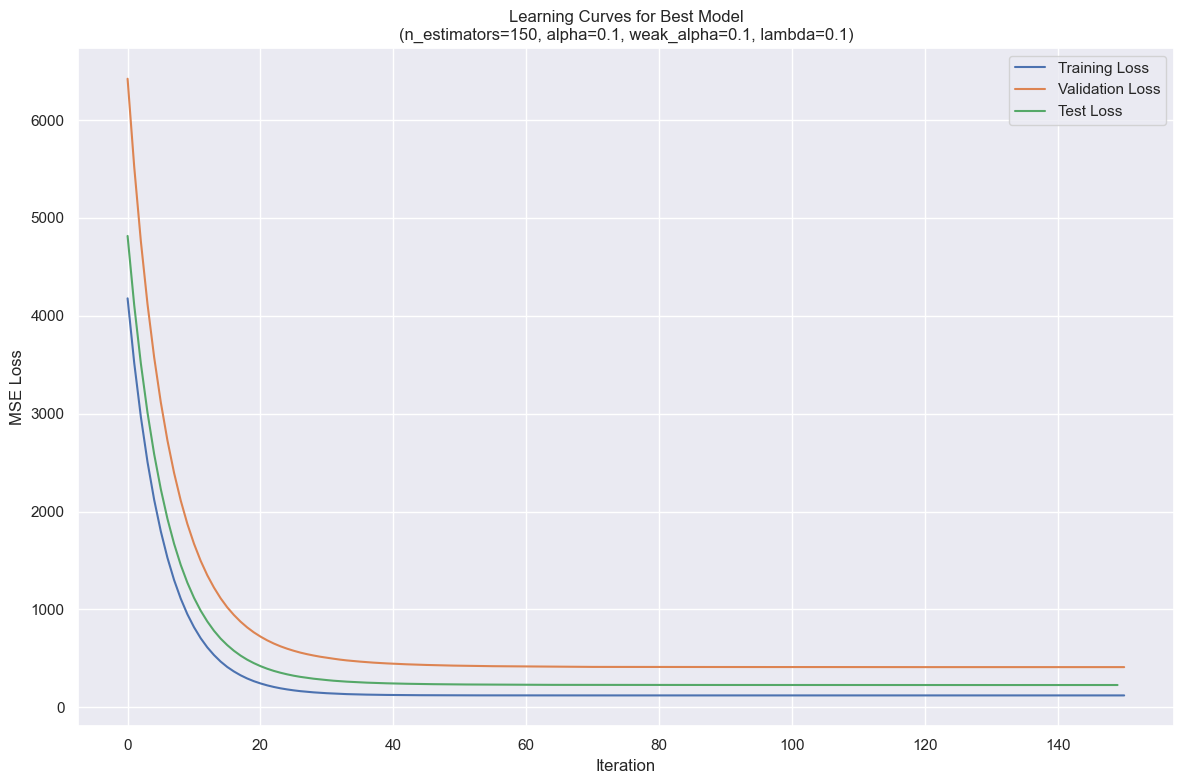

In [85]:
# Display results sorted by validation loss
print("\nTop 5 parameter combinations by validation loss:")
print(results_df.sort_values('valid_loss').head(5)[['n_estimators', 'alpha', 'weak_alpha', 'lambda', 'train_loss', 'valid_loss', 'test_mse', 'test_mae']])


best_model = plot_learning_curves(results_df)



## 5.1 Impact of Parameters

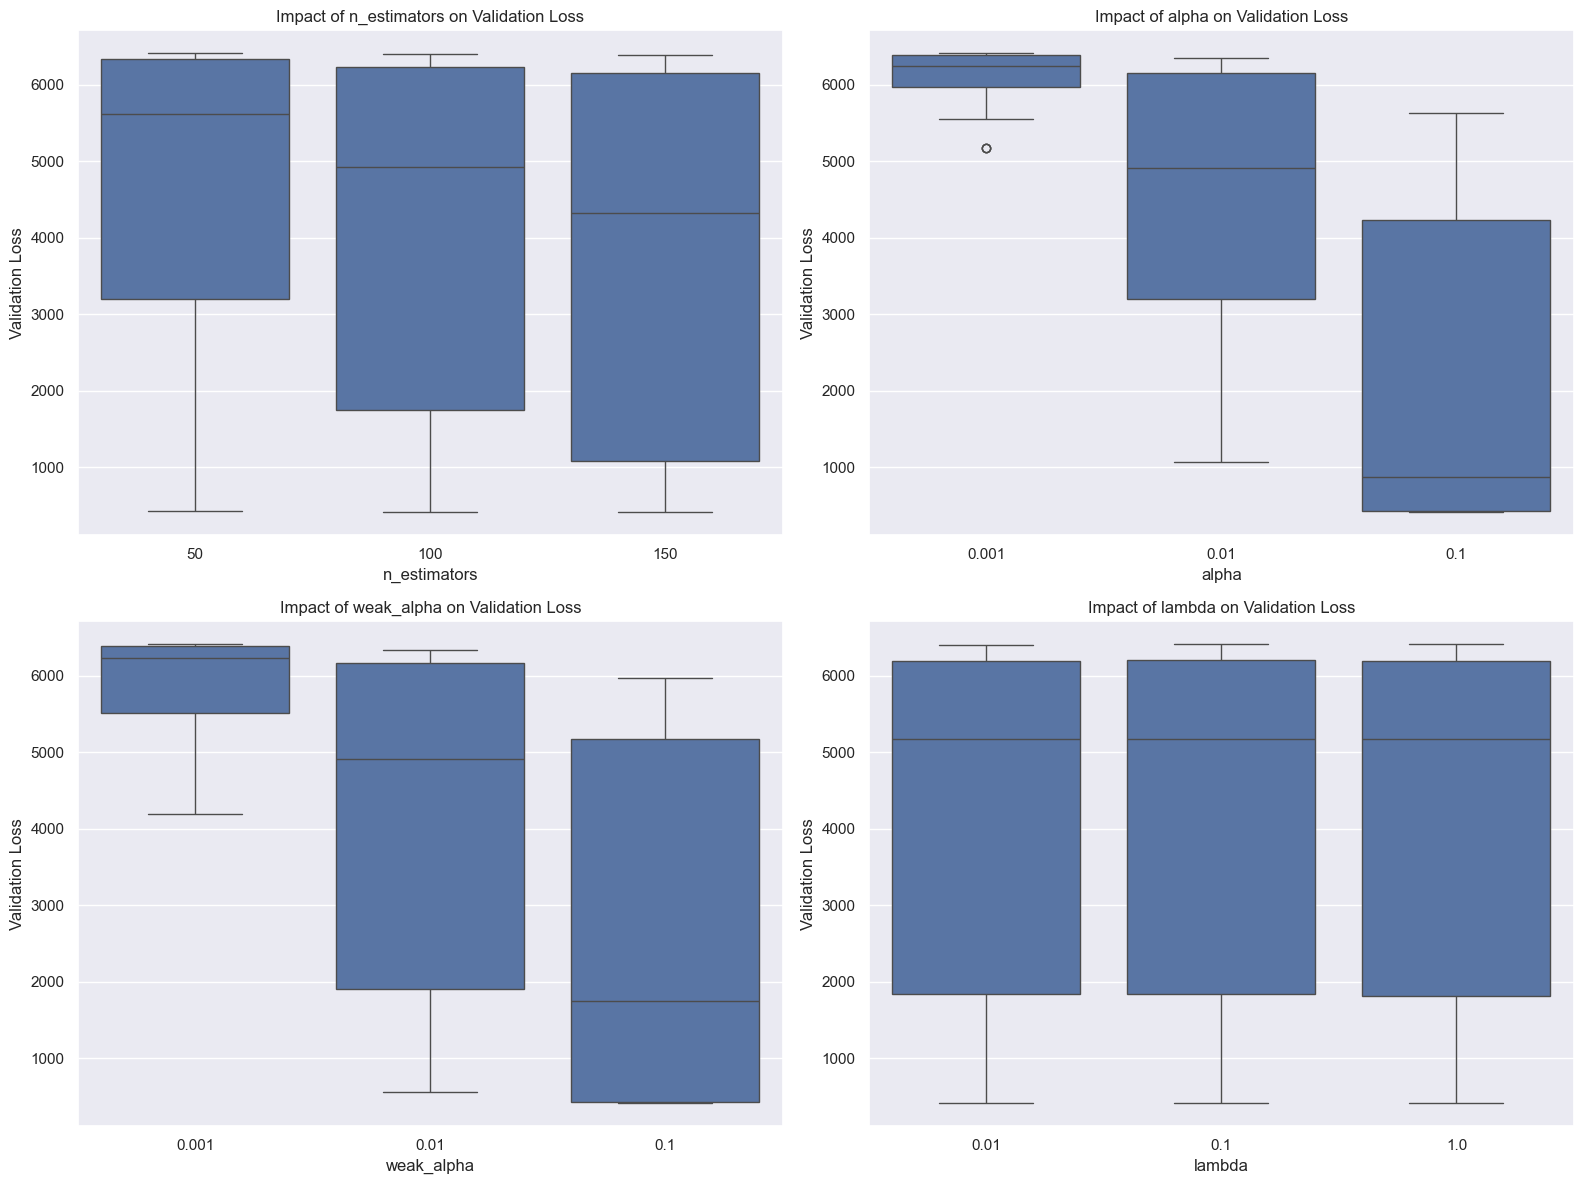

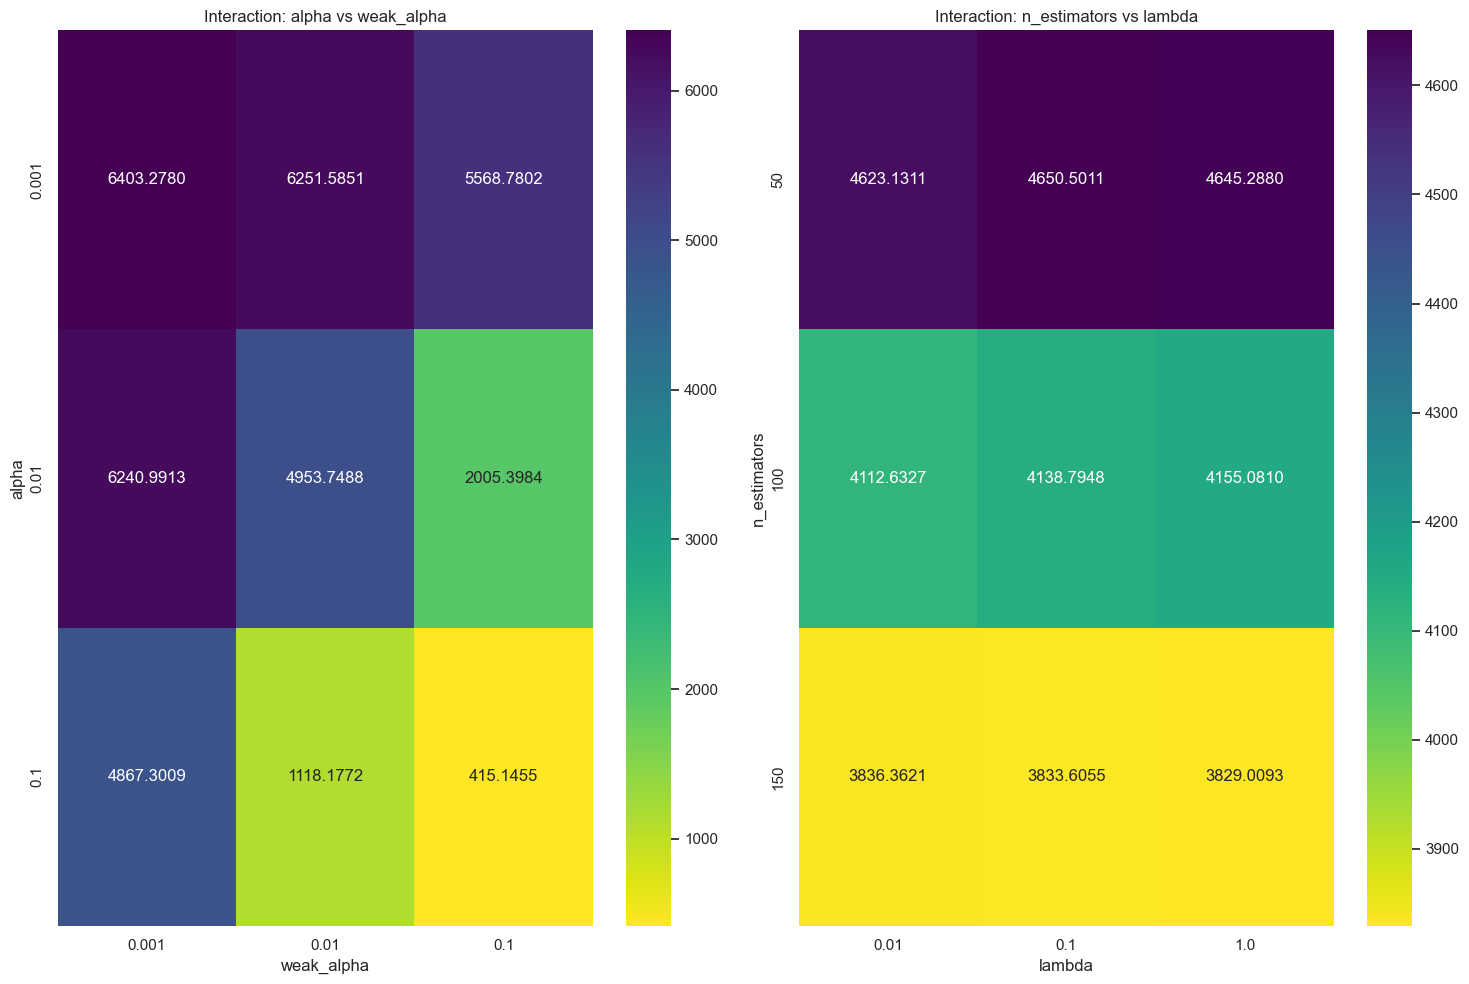

In [86]:
plot_parameter_impact(results_df)

# Kernelizarion

## 5.1 Form Kernelize Linear Regression with L1 Regularization (Lasso)

In [87]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Polynomial Kernel Transformation
degree = 5
poly = PolynomialFeatures(degree=degree, include_bias=False)
scaler = StandardScaler()

X_train_poly = scaler.fit_transform(poly.fit_transform(X_train))
X_valid_poly = scaler.transform(poly.transform(X_valid))
X_test_poly = scaler.transform(poly.transform(X_test))

lasso = Lasso(alpha=0.1, max_iter=1, warm_start=True)  # warm_start=True allows incremental training

train_loss_history = []
valid_loss_history = []
test_loss_history = []

train_mae_loss_history = []
valid_mae_loss_history = []
test_mae_loss_history = []

num_iterations = 5


## 5.2 Training

In [88]:
for i in range(num_iterations):
    lasso.fit(X_train_poly, Y_train)  
    
    y_train_pred = lasso.predict(X_train_poly)
    y_valid_pred = lasso.predict(X_valid_poly)
    y_test_pred = lasso.predict(X_test_poly)
    
    train_loss = mean_squared_error(Y_train, y_train_pred)
    valid_loss = mean_squared_error(Y_valid, y_valid_pred)
    test_loss = mean_squared_error(Y_test, y_test_pred)
    
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    test_loss_history.append(test_loss)

    train_loss = mean_absolute_error(Y_train, y_train_pred)
    valid_loss = mean_absolute_error(Y_valid, y_valid_pred)
    test_loss = mean_absolute_error(Y_test, y_test_pred)
    
    train_mae_loss_history.append(train_loss)
    valid_mae_loss_history.append(valid_loss)
    test_mae_loss_history.append(test_loss)

/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.628e+03, tolerance: 3.222e+01
  model = cd_fast.enet_coordinate_descent(
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.964e+03, tolerance: 3.222e+01
  model = cd_fast.enet_coordinate_descent(
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

## 5.3 Loss Visualization

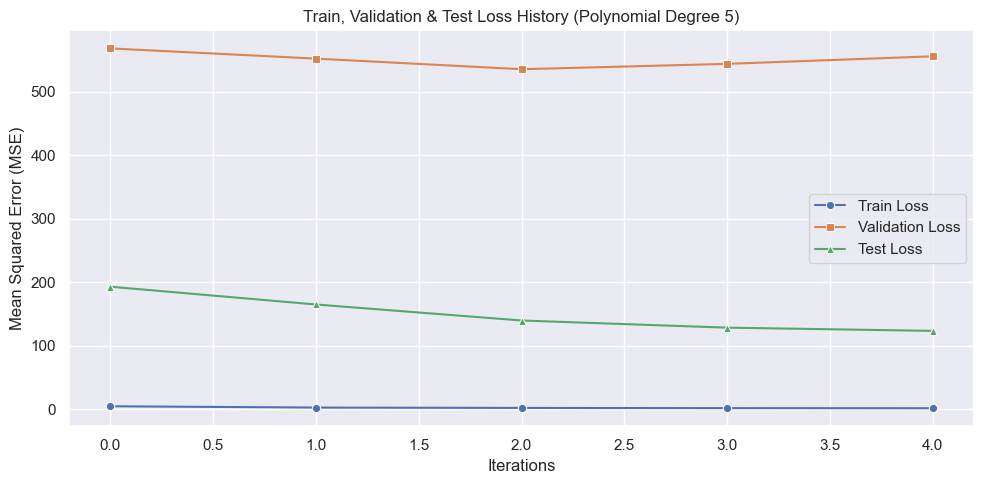

In [89]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(num_iterations), y=train_loss_history, label="Train Loss", marker="o")
sns.lineplot(x=range(num_iterations), y=valid_loss_history, label="Validation Loss", marker="s")
sns.lineplot(x=range(num_iterations), y=test_loss_history, label="Test Loss", marker="^")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title(f"Train, Validation & Test Loss History (Polynomial Degree {degree})")
plt.tight_layout()
plt.legend()
plt.show()

## 5.4 Evaluation

In [90]:
print(f"Min MSE is {min(test_loss_history)}\nMin MAE is {min(test_mae_loss_history)}")

Min MSE is 123.29714098523496
Min MAE is 3.6244338149388113
